Consider the Amazon Alexa Reviews Dataset. This dataset consists
of a nearly 3000 Amazon customer reviews (input text), star
ratings, date of review, variant and feedback of various amazon
Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.
Perform follwing operations on this dataset.

(i) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)

(ii) Plot the graph of Ratings distibution. 

(iii) Convert the review text into lowercase

(iv) Remove all punctuations from review text.

(v) Remove emoticons and emojis from the text

(vi) Tokenize the review text into words.

(vii) Remove the stopwords from the tokenized text.

(viii) Perform stemming & lemmatization on the review text.

(ix) Perform the word vectorization on review text using Bag of
Words technique.

(x) Create representation of Review Text by calculating Term
Frequency and Inverse Document Frequency (TF-IDF)

In [ ]:
import nltk 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the DataSet

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Dataset/amazon_alexa.xlsx")
df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1
5,5,2018-07-31,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,2018-07-31,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,2018-07-31,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,2018-07-30,Heather Gray Fabric,looks great,1
9,5,2018-07-30,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


Dropping columns that are not required

In [ ]:
df.drop(columns=['date', 'variation'], inplace=True)

Plotting a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)

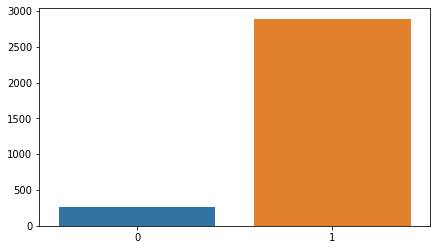

In [ ]:
fig = plt.figure(figsize=(7, 4))
d = df['feedback'].value_counts()
x = d.keys().to_list()
y = d.values.tolist()
sns.barplot(x=x, y=y)

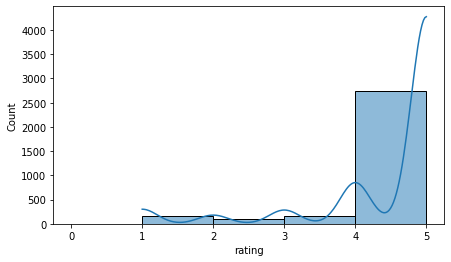

In [ ]:
# Plotting the graph of Ratings distibution 
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
fig = plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='rating', bins=5, kde=True, binrange=(0, 5))

#### Converting the review text to lowercase

In [ ]:
reviews = df['verified_reviews'].to_list()

def convert_lower(arr):
    return [i.lower() for i in arr]

reviews = convert_lower(reviews)
reviews[0:65]

['love my echo!',
 'loved it!',
 'sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home.',
 'i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.',
 'music',
 'i received the echo as a gift. i needed another bluetooth or something to play music easily accessible, and found this smart speaker. can’t wait to see what else it can do.',
 'without having a cellphone, i cannot use many of her features. i have an ipad but do not see that of any use.  it is a great alarm.  if u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.it is fun to ask random questions to hear her response.  she does not seem to be very smartbon politics yet.',
 "i think this is the 5th one i've

#####Removing all punctuations from review text

In [ ]:
from nltk.tokenize import word_tokenize

def remove_punct(arr):
    for i in range(len(arr)):
        arr[i] = " ".join(map(str, [w for w in word_tokenize(arr[i]) if w.isalpha()]))
    return arr

reviews = remove_punct(reviews)
reviews[0:5]

['love my echo',
 'loved it',
 'sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home',
 'i have had a lot of fun with this thing my yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well',
 'music']

##### Removing the emoticons and emojis from the text

In [ ]:
import re

# using regex for emoji patterns
def remove_emojis(arr):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)

    for i in range(len(arr)):
        arr[i] = emoji_pattern.sub(r'', arr[i])

    return arr

reviews = remove_emojis(reviews)
reviews[0:5]

['love my echo!',
 'loved it!',
 'sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home.',
 'i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.',
 'music']

####Tokenize the review text into words

In [ ]:
def tokenize_all(arr):
    return [word_tokenize(sent) for sent in arr]

reviews = tokenize_all(reviews)
reviews[0:5]

[['love', 'my', 'echo'],
 ['loved', 'it'],
 ['sometimes',
  'while',
  'playing',
  'a',
  'game',
  'you',
  'can',
  'answer',
  'a',
  'question',
  'correctly',
  'but',
  'alexa',
  'says',
  'you',
  'got',
  'it',
  'wrong',
  'and',
  'answers',
  'the',
  'same',
  'as',
  'you',
  'i',
  'like',
  'being',
  'able',
  'to',
  'turn',
  'lights',
  'on',
  'and',
  'off',
  'while',
  'away',
  'from',
  'home'],
 ['i',
  'have',
  'had',
  'a',
  'lot',
  'of',
  'fun',
  'with',
  'this',
  'thing',
  'my',
  'yr',
  'old',
  'learns',
  'about',
  'dinosaurs',
  'i',
  'control',
  'the',
  'lights',
  'and',
  'play',
  'games',
  'like',
  'categories',
  'has',
  'nice',
  'sound',
  'when',
  'playing',
  'music',
  'as',
  'well'],
 ['music']]

####Removing the stopwords from the tokenized text

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(arr):
    stop_words = stopwords.words('english')
    for i in range(len(arr)):
        arr[i] = [w for w in arr[i] if w not in stop_words]
    return arr

reviews = remove_stopwords(reviews)
reviews[0:5]

[['love', 'echo'],
 ['loved'],
 ['sometimes',
  'playing',
  'game',
  'answer',
  'question',
  'correctly',
  'alexa',
  'says',
  'got',
  'wrong',
  'answers',
  'like',
  'able',
  'turn',
  'lights',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  'yr',
  'old',
  'learns',
  'dinosaurs',
  'control',
  'lights',
  'play',
  'games',
  'like',
  'categories',
  'nice',
  'sound',
  'playing',
  'music',
  'well'],
 ['music']]

####Performing stemming and lemmatization on the review text

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def stem_lemmatize(arr):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    for i in range(len(arr)):
        # stem
        arr[i] = [stemmer.stem(w) for w in arr[i]]
        # lemmatize
        arr[i] = [lemmatizer.lemmatize(w) for w in arr[i]]
    
    return arr

reviews = stem_lemmatize(reviews)
reviews[0:5]

[['love', 'echo'],
 ['love'],
 ['sometim',
  'play',
  'game',
  'answer',
  'question',
  'correctli',
  'alexa',
  'say',
  'got',
  'wrong',
  'answer',
  'like',
  'abl',
  'turn',
  'light',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  'yr',
  'old',
  'learn',
  'dinosaur',
  'control',
  'light',
  'play',
  'game',
  'like',
  'categori',
  'nice',
  'sound',
  'play',
  'music',
  'well'],
 ['music']]

####converting arrays back to the sentences

In [ ]:
for i in range(len(reviews)):
    reviews[i] = " ".join(map(str, reviews[i]))

print(reviews[0:5])

['love echo', 'love', 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home', 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well', 'music']


####Performing word vectorization on review text using Bag of Words technique

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectoriser = CountVectorizer()
X = vectoriser.fit_transform(reviews)
print("Bag of Words")
print(vectoriser.get_feature_names())


Bag of Words
['abay', 'abc', 'abd', 'abil', 'abl', 'abod', 'absolut', 'absolutli', 'ac', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'accustom', 'acknowledg', 'acoust', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addon', 'address', 'adept', 'adequ', 'adjac', 'adjust', 'admit', 'adopt', 'ador', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'aesthet', 'af', 'affirm', 'afford', 'afraid', 'afternoon', 'afterward', 'age', 'agent', 'ago', 'agre', 'agreement', 'ahead', 'ai', 'aid', 'aint', 'air', 'aka', 'al', 'alabama', 'alarm', 'albeit', 'alcohol', 'alert', 'alex', 'alexa', 'alexi', 'alexia', 'alexu', 'algo', 'aliv', 'allevi', 'allow', 'allrecip', 'almost', 'alon', 'along', 'alongsid', 'alot', 'aloud', 'alread', 'alreadi', 'alright', 'also', 'alter', 'altern', 'although', 'alway', 'amaonmaz', 'amax', 'amaz', 'amazin', 'amazingli', 

In [ ]:
# printing vectors
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Shape of vector
X.shape

(3150, 2701)

####Creating representation of review text by calculating the Term Frequency and Inverse Document Frequency (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer()
X = vectoriser.fit_transform(reviews)
print('TFIDF:')
print(vectoriser.get_feature_names())

TFIDF:
['abay', 'abc', 'abd', 'abil', 'abl', 'abod', 'absolut', 'absolutli', 'ac', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'accustom', 'acknowledg', 'acoust', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addon', 'address', 'adept', 'adequ', 'adjac', 'adjust', 'admit', 'adopt', 'ador', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'aesthet', 'af', 'affirm', 'afford', 'afraid', 'afternoon', 'afterward', 'age', 'agent', 'ago', 'agre', 'agreement', 'ahead', 'ai', 'aid', 'aint', 'air', 'aka', 'al', 'alabama', 'alarm', 'albeit', 'alcohol', 'alert', 'alex', 'alexa', 'alexi', 'alexia', 'alexu', 'algo', 'aliv', 'allevi', 'allow', 'allrecip', 'almost', 'alon', 'along', 'alongsid', 'alot', 'aloud', 'alread', 'alreadi', 'alright', 'also', 'alter', 'altern', 'although', 'alway', 'amaonmaz', 'amax', 'amaz', 'amazin', 'amazingli', 'amazo

In [ ]:
# TFIDF Array
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# shape of matrix formed
X.shape

(3150, 2701)